In [13]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits


In [14]:
from skimage import io
from skimage import transform

In [15]:
#plt.style.use('seaborn')
plt.rc('legend', fontsize=16) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
plt.rc('axes', titlesize=16)
#plt.rcParams['axes.facecolor'] = "w"

In [16]:
def get_imgarr(fitsfile):
    """get image array from fits"""
    from astropy.io import fits
    hdul = fits.open(fitsfile)
    item0 = hdul[0]
    if item0.is_image:
        imgarr = item0.data
        return imgarr[::-1, :]  # invert y to be same as jpg
    else:
        print('not image')
    

In [17]:
def fits_to_uint8(fitsarr, vmin=-1, vmax=1,):
    
    # clip
    data = np.clip(fitsarr, vmin, vmax)
    # scale to [0,1]
    data = (data - vmin) / (vmax - vmin)
    # convert to uint8
    data = (255 * data).astype(np.uint8)
    # invert y axis
    #data = data[::-1, :]
    return data



In [22]:
def get_RaDec(fitspath):
    """get ra/dec from filename"""
    basename = os.path.basename(fitspath)
    ra = float( basename[:3] )
    dec = float( basename[3:6] )
    
    return ra, dec
    
    

In [19]:
fitslist = glob.glob("./atlas/cand1/*.wp.fits")
fitslist.sort()
fitslist

['./atlas/cand1/004+57.58450.wp.fits',
 './atlas/cand1/006+57.58650.wp.fits',
 './atlas/cand1/012+58.58400.wp.fits',
 './atlas/cand1/013+59.58400.wp.fits',
 './atlas/cand1/015+59.58400.wp.fits',
 './atlas/cand1/016+59.58400.wp.fits',
 './atlas/cand1/017+59.58400.wp.fits',
 './atlas/cand1/022+58.58400.wp.fits',
 './atlas/cand1/082+12.58500.wp.fits',
 './atlas/cand1/320+59.58450.wp.fits',
 './atlas/cand1/323+58.58400.wp.fits',
 './atlas/cand1/325+57.58400.wp.fits',
 './atlas/cand1/326+57.58400.wp.fits',
 './atlas/cand1/339+57.58400.wp.fits',
 './atlas/cand1/348+64.58400.wp.fits',
 './atlas/cand1/350+60.58400.wp.fits',
 './atlas/cand1/352+60.58400.wp.fits',
 './atlas/cand1/353+59.58650.wp.fits',
 './atlas/cand1/354+59.58450.wp.fits']

In [20]:
for fitspath in fitslist:
    arr = fits.open(fitspath)[0].data
    print(fitspath, arr.min(), arr.max() )
    

./atlas/cand1/004+57.58450.wp.fits -9924.766 2023.9409
./atlas/cand1/006+57.58650.wp.fits -15290.983 3206.0818
./atlas/cand1/012+58.58400.wp.fits -14957.035 4328.359
./atlas/cand1/013+59.58400.wp.fits -13087.553 2747.7766
./atlas/cand1/015+59.58400.wp.fits -10189.093 1936.3594
./atlas/cand1/016+59.58400.wp.fits -10449.836 2018.9374
./atlas/cand1/017+59.58400.wp.fits -9359.554 2680.2944
./atlas/cand1/022+58.58400.wp.fits -11653.1 2026.989
./atlas/cand1/082+12.58500.wp.fits -17031.926 2797.4805
./atlas/cand1/320+59.58450.wp.fits -10648.125 2483.6387
./atlas/cand1/323+58.58400.wp.fits -12640.857 3043.0864
./atlas/cand1/325+57.58400.wp.fits -11569.688 2334.9207
./atlas/cand1/326+57.58400.wp.fits -14460.683 2734.8022
./atlas/cand1/339+57.58400.wp.fits -15391.062 2356.6868
./atlas/cand1/348+64.58400.wp.fits -32898.375 3834.805
./atlas/cand1/350+60.58400.wp.fits -45348.758 5386.5493
./atlas/cand1/352+60.58400.wp.fits -29982.09 6368.465
./atlas/cand1/353+59.58650.wp.fits -8391.826 2298.3484
./

In [9]:
fitspath = fitslist[0]
fits.open(fitspath)[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1800                                                  
NAXIS2  =                 1800                                                  
CNPIX1  =                    0                                                  
CNPIX2  =                    0                                                  
CRPIX1  =                    1                                                  
CRPIX2  =                    1                                                  
CRVAL1  =           4.00000000                                                  
CRVAL2  =          57.00000000                                                  
OBSNAME = '02a58500o0215o'                                                      
SITECAM = '02a'             

In [10]:
arr = fits.open(fitspath)[0].data

In [11]:
arr.min(), arr.max()

(-9924.766, 2023.9409)

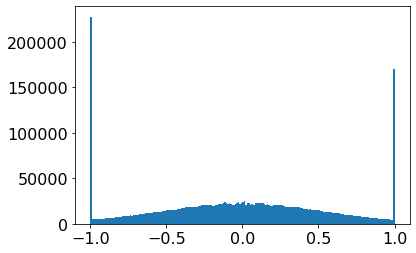

In [12]:
plt.hist(np.clip( arr.flatten(), -1, 1), bins=200);

#plt.xlim([-10, 10])

In [238]:
np.sum( np.abs(arr) > 1  )/ (1800*1800)

0.1200429012345679

In [242]:
np.sum( np.abs(arr) > 10  )/ (1800*1800)

0.009816666666666666

In [249]:
image = np.clip(arr, -10, 10)
image = (image - image.mean() )/ image.std()

In [250]:
image.mean(),image.std()

(-1.3940128e-09, 1.0000002)

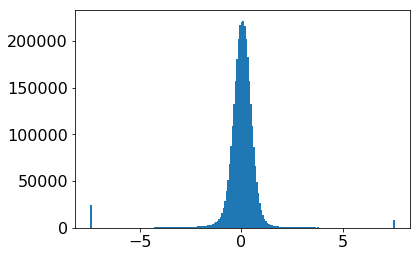

In [227]:
plt.hist(image.flatten(), bins=200);


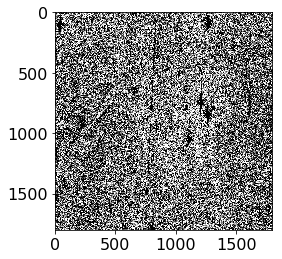

In [13]:
#fitspath = fitslist[0]

fitspath = "./atlas/cand1/352+60.58400.wp.fits"
imgarr = fits.open(fitspath)[0].data

img = fits_to_uint8(imgarr)
plt.imshow(img, cmap='gray')

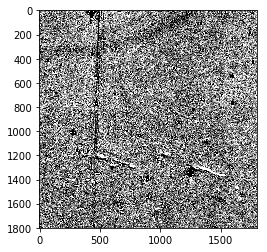

In [38]:
fitspath = fitslist[2]
imgarr = fits.open(fitspath)[0].data

img = fits_to_uint8(imgarr)
plt.imshow(img, cmap='gray')

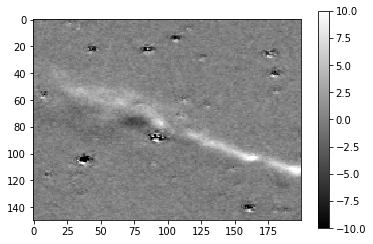

In [59]:
plt.imshow(imgarr[1250:1400,1300:1500],cmap='gray', clim=[-10, 10])
plt.colorbar()

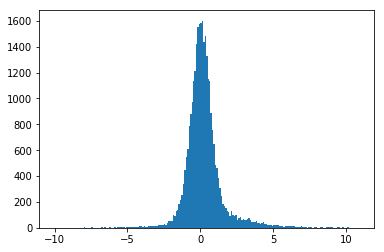

In [64]:
a = imgarr[1250:1400,1300:1500].flatten()

plt.hist(a, bins=np.arange(-10, 11, .1));

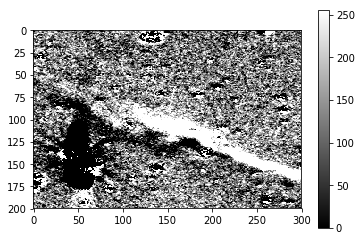

In [41]:
plt.imshow(img[1200:1400,1200:1500], cmap='gray')
plt.colorbar()

In [ ]:
fitspath = fitslist[2]
imgarr = fits.open(fitspath)[0].data

fitspath = fitslist[0]
arr = fits.open(fitspath)[0].data



(0, 40000)

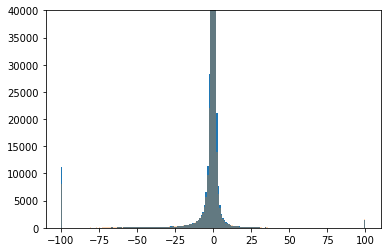

In [37]:

plt.hist(np.clip( imgarr.flatten(), -100, 100), bins=200);

plt.hist(np.clip( arr.flatten(), -100, 100), bins=200, alpha=0.3);

plt.ylim([0, 40000])

### prepare info csv

In [23]:
ra = []
dec = []
for fitspath in fitslist:
    r, d = get_RaDec(fitspath)
    ra.append(r)
    dec.append(d)

In [30]:
df_info = pd.DataFrame()
df_info['files'] = [os.path.basename(i) for i in fitslist]
df_info['id'] = np.arange(1, len(fitslist)+1)
df_info['ra'] = ra
df_info['dec'] = dec

df_info

,files,id,ra,dec
0,004+57.58450.wp.fits,1,4.0,57.0
1,006+57.58650.wp.fits,2,6.0,57.0
2,012+58.58400.wp.fits,3,12.0,58.0
3,013+59.58400.wp.fits,4,13.0,59.0
4,015+59.58400.wp.fits,5,15.0,59.0
5,016+59.58400.wp.fits,6,16.0,59.0
6,017+59.58400.wp.fits,7,17.0,59.0
7,022+58.58400.wp.fits,8,22.0,58.0
8,082+12.58500.wp.fits,9,82.0,12.0
9,320+59.58450.wp.fits,10,320.0,59.0


In [31]:
sources = [ 'Tycho', 'unknown', 'Tycho', 'Tycho', 'Tycho', 'Tycho', 'Tycho',
       'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
       'CasA', 'CasA', 'Tycho', 'Tycho', 'Tycho', 'Tycho' ]

In [32]:
df_info['source'] = sources

In [11]:
#df_info.to_csv("cand1.csv", index=False)


In [26]:
df_info = pd.read_csv("./cand1.csv")
df_info

,files,id,ra,dec,source
0,004+57.58450.wp.fits,1,4.0,57.0,Tycho
1,006+57.58650.wp.fits,2,6.0,57.0,unknown
2,012+58.58400.wp.fits,3,12.0,58.0,Tycho
3,013+59.58400.wp.fits,4,13.0,59.0,Tycho
4,015+59.58400.wp.fits,5,15.0,59.0,Tycho
5,016+59.58400.wp.fits,6,16.0,59.0,Tycho
6,017+59.58400.wp.fits,7,17.0,59.0,Tycho
7,022+58.58400.wp.fits,8,22.0,58.0,unknown
8,082+12.58500.wp.fits,9,82.0,12.0,unknown
9,320+59.58450.wp.fits,10,320.0,59.0,unknown


### plot positions

In [35]:
def plot_mwd(ax, RA, Dec, c, org=0, title='Mollweide projection', projection='mollweide', 
             vmax=None, vmin=None, colorbar=True, marker='o', s=5,  **kwargs):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    
    Examples:
    >>> fig, ax = plt.subplots(1, 1, figsize=(8, 8), 
                            subplot_kw={'projection': 'mollweide'}); 
        plot_mwd(ax, x, y, c, title='') 
    '''
    import numpy as np
    import matplotlib.pyplot as plt

    #if vmax is None:
    #    vmax = c.max()
    
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    # fig = plt.figure(figsize=(10, 5))
    # ax = fig.add_subplot(111, projection=projection, facecolor ='LightCyan')
    # ax = fig.add_subplot(111, projection=projection, facecolor ='honeydew')
    sc = ax.scatter(np.radians(x), np.radians(Dec), c=c, s=s, marker=marker, **kwargs)  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)
    if colorbar:
        cbar = plt.colorbar(sc, ax=ax, orientation="horizontal")
    #cbar.set_clim(-2.0, 2.0)



In [34]:
Fields = pd.read_csv('https://raw.githubusercontent.com/xiaolng/OpSimDashboard/main/data/Fields_nside64.csv')


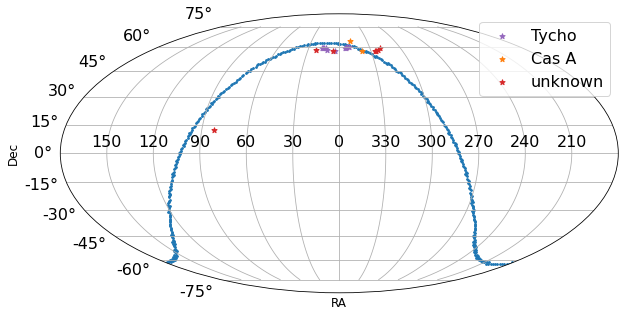

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), 
                            subplot_kw={'projection': 'mollweide'}); 

df = Fields[ (Fields['fieldGb']>-.5) & (Fields['fieldGb']<.5) ]
x = df['fieldRa'].values
y = df['fieldDec'].values
c = 'tab:blue'
plot_mwd(ax, x, y, c, title='', colorbar=False, s=3, ) 

x = df_info['ra'][df_info['source']=='Tycho' ]
y = df_info['dec'][df_info['source']=='Tycho' ]
c = 'tab:purple'

plot_mwd(ax, x, y, c, title='', colorbar=False, marker='*', s=30,  label='Tycho')


x = df_info['ra'][df_info['source']=='CasA' ]
y = df_info['dec'][df_info['source']=='CasA' ]
c = 'tab:orange'

plot_mwd(ax, x, y, c, title='', colorbar=False, marker='*', s=30,  label='Cas A')

x = df_info['ra'][df_info['source']=='unknown' ]
y = df_info['dec'][df_info['source']=='unknown' ]
c = 'tab:red'

plot_mwd(ax, x, y, c, title='', colorbar=False, marker='*', s=30,  label='unknown')



#x = info['ra'][info.test]
#y = info['dec'][info.test]
#c = 'tab:orange'
#plot_mwd(ax, x, y, c, title='', colorbar=False, marker='^', s=30, label='test', alpha=0.5)
#ax.set_xticklabels([None, None, 90, None, None, 0, None, None, 270, None, None]);

plt.legend()



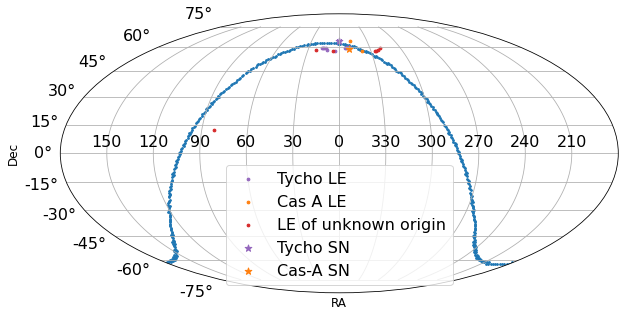

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), 
                            subplot_kw={'projection': 'mollweide'}); 

df = Fields[ (Fields['fieldGb']>-.5) & (Fields['fieldGb']<.5) ]
x = df['fieldRa'].values
y = df['fieldDec'].values
c = 'tab:blue'
plot_mwd(ax, x, y, c, title='', colorbar=False, s=3, ) 


x = df_info['ra'][df_info['source']=='Tycho' ]
y = df_info['dec'][df_info['source']=='Tycho' ]
c = 'tab:purple'

plot_mwd(ax, x, y, c, title='', colorbar=False, marker='.', s=30,  label='Tycho LE')


x = df_info['ra'][df_info['source']=='CasA' ]
y = df_info['dec'][df_info['source']=='CasA' ]
c = 'tab:orange'

plot_mwd(ax, x, y, c, title='', colorbar=False, marker='.', s=30,  label='Cas A LE')

x = df_info['ra'][df_info['source']=='unknown' ]
y = df_info['dec'][df_info['source']=='unknown' ]
c = 'tab:red'

plot_mwd(ax, x, y, c, title='', colorbar=False, marker='.', s=30,  label='LE of unknown origin')



x = np.array([0.42])
y = np.array([64.15])
c = 'tab:purple'
plot_mwd(ax, x, y, c, title='', colorbar=False, marker='*', s=50,  label='Tycho SN')


x = np.array([350.85])
y = np.array([58.8])
c = 'tab:orange'
plot_mwd(ax, x, y, c, title='', colorbar=False, marker='*', s=50,  label='Cas-A SN')


#x = info['ra'][info.test]
#y = info['dec'][info.test]
#c = 'tab:orange'
#plot_mwd(ax, x, y, c, title='', colorbar=False, marker='^', s=30, label='test', alpha=0.5)
#ax.set_xticklabels([None, None, 90, None, None, 0, None, None, 270, None, None]);

plt.legend()

# zoom in to top reigon


In [41]:
def get_x(RA, org=0):
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    return x


In [39]:
from matplotlib.gridspec import GridSpec
import matplotlib.lines as lines


In [107]:
[0,1,2,3][1:3]

[1, 2]

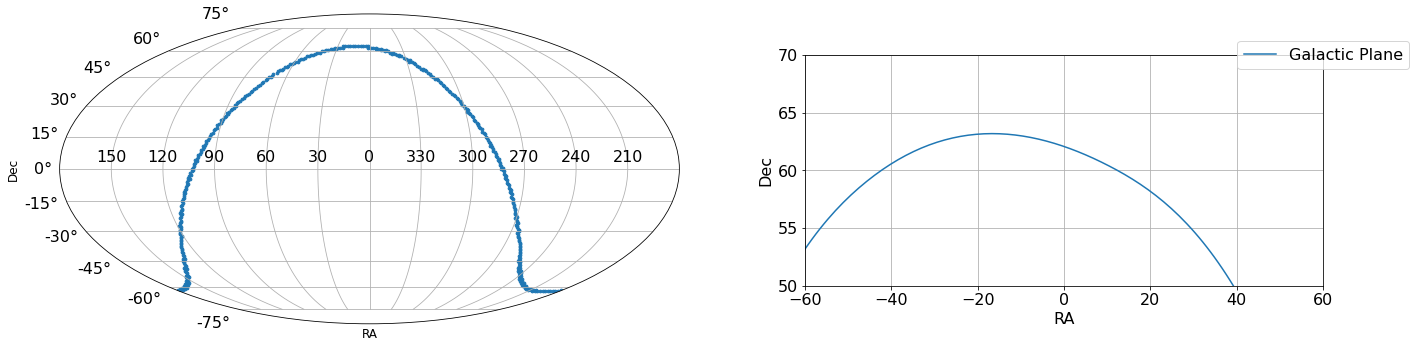

In [52]:
fig = plt.figure(figsize=(18, 8),)

gs = GridSpec(3, 8, figure=fig, )#width_ratios=[3, 1],)


ax0 = fig.add_subplot(gs[:3, :5], projection = 'mollweide')
ax = fig.add_subplot(gs[1:3, 6:8])


s = 200

# plot galactic plane
df = Fields[ (Fields['fieldGb']>-.5) & (Fields['fieldGb']<.5) ]
x = df['fieldRa'].values
y = df['fieldDec'].values
c = 'tab:blue'
plot_mwd(ax0, x, y, c, title='', colorbar=False, marker='.', s=30,  label='Galactic Plane')


x = get_x(x)

#ax.scatter(x=x, y=y, color=c, s=30, label='Galactic Plane') 
newx = np.linspace(-90, 90, 200)
ax.plot(newx, spl(newx), '-', label='Galactic Plane')


# ----------------------

#ax.set_xlim([-50, 50])
ax.set_ylim([50, 70])
ax.set_xlim([-60, 60])

#plt.legend()
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

ax.grid()
ax.legend(loc='center', bbox_to_anchor=(1, 1.))

ax.set_position([0.7, 0.3, 0.4, 0.4])


In [47]:
x, idx = np.unique(x, return_index=True)
y = y[idx]

idx_sort = np.argsort(x)

x = x[idx_sort]
y = y[idx_sort]

In [48]:
spl = make_interp_spline(x[::30], y[::30], k=3)

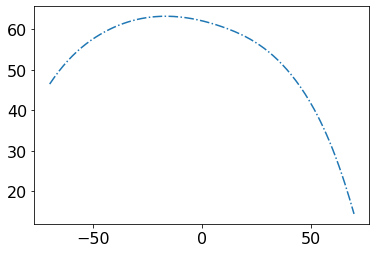

In [49]:
newx = np.linspace(-70, 70, 200)
plt.plot(newx, spl(newx), '-.')



In [50]:
from scipy.interpolate import make_interp_spline


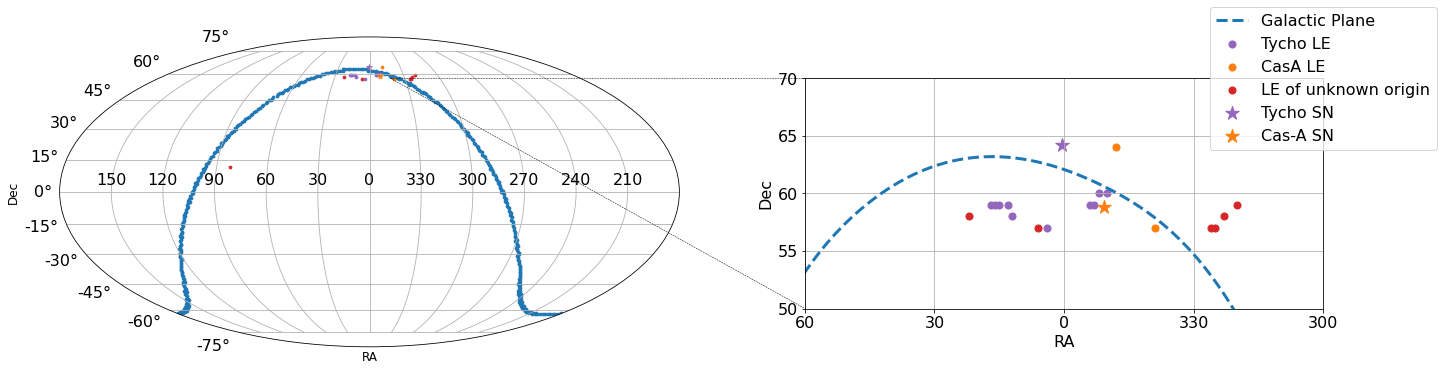

In [51]:
fig = plt.figure(figsize=(18, 8),)

gs = GridSpec(3, 8, figure=fig, )#width_ratios=[3, 1],)


ax0 = fig.add_subplot(gs[:3, :5], projection = 'mollweide')
ax = fig.add_subplot(gs[1:3, 6:8])


s = 200

# plot galactic plane
df = Fields[ (Fields['fieldGb']>-.5) & (Fields['fieldGb']<.5) ]
x = df['fieldRa'].values
y = df['fieldDec'].values
c = 'tab:blue'
plot_mwd(ax0, x, y, c, title='', colorbar=False, marker='.', s=30,  label='Galactic Plane')


x = get_x(x)

#ax.scatter(x=x, y=y, color=c, s=30, label='Galactic Plane') 
newx = np.linspace(-90, 90, 200)
ax.plot(newx, spl(newx), '--', label='Galactic Plane', linewidth=3)

# plot Tycho LE

x = df_info['ra'][df_info['source']=='Tycho' ]
y = df_info['dec'][df_info['source']=='Tycho' ]
c = 'tab:purple'
plot_mwd(ax0, x, y, c, title='', colorbar=False, marker='.', s=30,  label='Tycho LE')

x = get_x(x)
ax.scatter(x, y, color=c, s=s, marker='.', label='Tycho LE') 

# plot CasA LE
x = df_info['ra'][df_info['source']=='CasA' ]
y = df_info['dec'][df_info['source']=='CasA' ]
c = 'tab:orange'
plot_mwd(ax0, x, y, c, title='', colorbar=False, marker='.', s=30,  label='CasA LE')

x = get_x(x)
ax.scatter(x, y, color=c, s=s, marker='.', label='CasA LE')

# plot unknown
x = df_info['ra'][df_info['source']=='unknown' ]
y = df_info['dec'][df_info['source']=='unknown' ]
c = 'tab:red'
plot_mwd(ax0, x, y, c, title='', colorbar=False, marker='.', s=30,  label='LE of unknown origin')

x = get_x(x)
ax.scatter(x, y, color=c, s=s, marker='.', label='LE of unknown origin')

# plot Tycho SN

x = np.array([0.42])
y = np.array([64.15])
c = 'tab:purple'
plot_mwd(ax0, x, y, c, title='', colorbar=False, marker='*', s=30,  label='Tycho SN')
x = get_x(x)
ax.scatter(x, y, color=c, s=s, marker='*', label='Tycho SN')

# plot Cas-A SN
x = np.array([350.85])
y = np.array([58.8])
c = 'tab:orange'
plot_mwd(ax0, x, y, c, title='', colorbar=False, marker='*', s=30,  label='CasA SN')
x = get_x(x)
ax.scatter(x, y, color=c, s=s, marker='*', label='Cas-A SN')


org = 0
tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
tick_labels = np.remainder(tick_labels+360+org,360)

ax.set_xticks(ticks=[ -150.,-120, -90,  -60.,  -30., 0., 30, 60, 90, 120, 150])
ax.set_xticklabels(tick_labels);
#ax.set_xlim([-50, 50])
ax.set_ylim([50, 70])
ax.set_xlim([-60, 60])

#plt.legend()
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

ax.grid()
ax.legend(loc='center', bbox_to_anchor=(1, 1.))

ax.set_position([0.7, 0.3, 0.4, 0.4])
## draw lines [xmin, xmax], [ymin, ymax]
fig.add_artist(lines.Line2D([0.38, 0.70], [0.7, 0.7], 
                            color='k', linestyle='dashed', linewidth=0.5))
fig.add_artist(lines.Line2D([0.38, 0.70], [0.7, 0.3],
                            color='k', linestyle='dashed', linewidth=0.5))


In [51]:
tick_labels

array([150, 120,  90,  60,  30,   0, 330, 300, 270, 240, 210])

In [52]:
ax.get_xticks()

array([-200., -150., -100.,  -50.,    0.,   50.,  100.,  150.,  200.])

In [ ]:
ax.set_xticks(ticks=[ -150.,-120, -90,  -60.,  -30., 0., 30, 60, 90, 120, 150])

(0, 0.8)

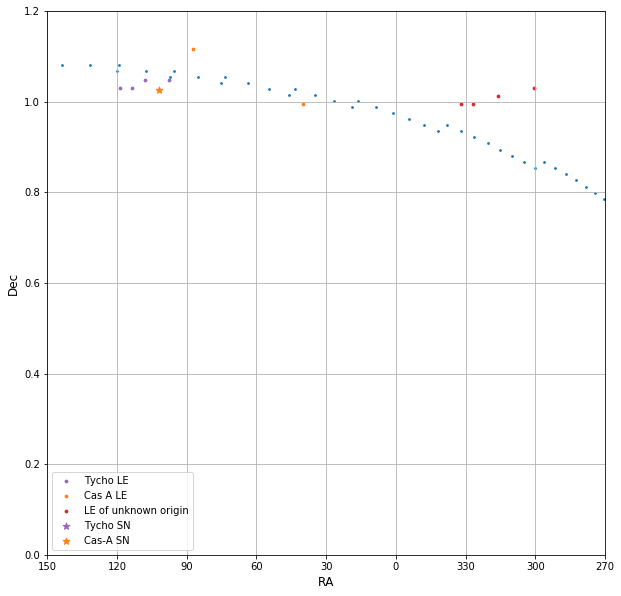

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), )
                            #subplot_kw={'projection': 'mollweide'}); 

df = Fields[ (Fields['fieldGb']>-.5) & (Fields['fieldGb']<.5) ]
x = df['fieldRa'].values
y = df['fieldDec'].values
c = 'tab:blue'
plot_mwd(ax, x, y, c, title='', colorbar=False, s=3, ) 


x = df_info['ra'][df_info['source']=='Tycho' ]
y = df_info['dec'][df_info['source']=='Tycho' ]
c = 'tab:purple'

plot_mwd(ax, x, y, c, title='', colorbar=False, marker='.', s=30,  label='Tycho LE')


x = df_info['ra'][df_info['source']=='CasA' ]
y = df_info['dec'][df_info['source']=='CasA' ]
c = 'tab:orange'

plot_mwd(ax, x, y, c, title='', colorbar=False, marker='.', s=30,  label='Cas A LE')

x = df_info['ra'][df_info['source']=='unknown' ]
y = df_info['dec'][df_info['source']=='unknown' ]
c = 'tab:red'

plot_mwd(ax, x, y, c, title='', colorbar=False, marker='.', s=30,  label='LE of unknown origin')



x = np.array([0.42])
y = np.array([64.15])
c = 'tab:purple'
plot_mwd(ax, x, y, c, title='', colorbar=False, marker='*', s=50,  label='Tycho SN')


x = np.array([350.85])
y = np.array([58.8])
c = 'tab:orange'
plot_mwd(ax, x, y, c, title='', colorbar=False, marker='*', s=50,  label='Cas-A SN')


#x = info['ra'][info.test]
#y = info['dec'][info.test]
#c = 'tab:orange'
#plot_mwd(ax, x, y, c, title='', colorbar=False, marker='^', s=30, label='test', alpha=0.5)
#ax.set_xticklabels([None, None, 90, None, None, 0, None, None, 270, None, None]);

plt.legend()

# zoom in to top reigon
#plt.ylim([0, 1.2])
#plt.xlim([0, 0.8])

### crop and split

In [53]:
fitslist

['./atlas/cand1/004+57.58450.wp.fits',
 './atlas/cand1/006+57.58650.wp.fits',
 './atlas/cand1/012+58.58400.wp.fits',
 './atlas/cand1/013+59.58400.wp.fits',
 './atlas/cand1/015+59.58400.wp.fits',
 './atlas/cand1/016+59.58400.wp.fits',
 './atlas/cand1/017+59.58400.wp.fits',
 './atlas/cand1/022+58.58400.wp.fits',
 './atlas/cand1/082+12.58500.wp.fits',
 './atlas/cand1/320+59.58450.wp.fits',
 './atlas/cand1/323+58.58400.wp.fits',
 './atlas/cand1/325+57.58400.wp.fits',
 './atlas/cand1/326+57.58400.wp.fits',
 './atlas/cand1/339+57.58400.wp.fits',
 './atlas/cand1/348+64.58400.wp.fits',
 './atlas/cand1/350+60.58400.wp.fits',
 './atlas/cand1/352+60.58400.wp.fits',
 './atlas/cand1/353+59.58650.wp.fits',
 './atlas/cand1/354+59.58450.wp.fits']

In [54]:
len(fitslist)

19

In [55]:
1800 - 1728

72

## crop and rename fits file

In [59]:
mkdir './dataset/LE_cand1/ori'

In [60]:
# clip the white edge 

for i, fitsfile in enumerate( fitslist ):
    #fitsfile = fitslist[0]
    
    fitsarr = get_imgarr(fitsfile)
    
    vmax = 1
    img_fromfits = fits_to_uint8(fitsarr, vmin=-vmax, vmax=vmax)
    
    # clip to target size 
    fitsarr = fitsarr[36:1764, 36:1764]
    img_fromfits = img_fromfits[36:1764, 36:1764]
    
    # transform to target size
    #size = 1728
    #newarr = transform.resize(image=img_fromfits, output_shape=(size, size) )
    
    #fname = './LEs576_new/{}.jpg'.format( os.path.basename( fitsfile ) )
    #npzfile = './LEs576_new/{}.npz'.format( os.path.basename( fitsfile ) )
    #io.imsave(arr=(255*newarr).astype(np.uint8), fname=fname)
    
    fname = "{:0>3d}".format(i+1)
    jpgfile = "./dataset/LE_cand1/ori/{}.jpg".format( fname )
    npzfile = "./dataset/LE_cand1/ori/{}.fits.npz".format( fname )
    
    cv2.imwrite(jpgfile, img_fromfits,)
    np.savez(file=npzfile, fitsarr=fitsarr)
    
    #plt.figure(figsize=(8,8))
    #plt.imshow(img_fromfits, cmap='gray')


In [64]:

def split_img(img, N=3, M=3):
    """split image array to N*M tiles"""

    imgshape = img.shape
    
    tilex = int( imgshape[0] / N )
    tiley = int( imgshape[1] / M )
    
    imgtiles = []
    for i in range( N ):
        for j in range(M):
            tile = img[i*tilex : (i+1)*tilex, j*tiley : (j+1)*tiley]
            imgtiles.append( tile )
            #print((i), (j), i*N + j, tile.shape)

    return imgtiles


In [62]:
npzlist = glob.glob("./dataset/LE_cand1/ori/*.npz")
npzlist.sort()
npzlist

['./dataset/LE_cand1/ori/001.fits.npz',
 './dataset/LE_cand1/ori/002.fits.npz',
 './dataset/LE_cand1/ori/003.fits.npz',
 './dataset/LE_cand1/ori/004.fits.npz',
 './dataset/LE_cand1/ori/005.fits.npz',
 './dataset/LE_cand1/ori/006.fits.npz',
 './dataset/LE_cand1/ori/007.fits.npz',
 './dataset/LE_cand1/ori/008.fits.npz',
 './dataset/LE_cand1/ori/009.fits.npz',
 './dataset/LE_cand1/ori/010.fits.npz',
 './dataset/LE_cand1/ori/011.fits.npz',
 './dataset/LE_cand1/ori/012.fits.npz',
 './dataset/LE_cand1/ori/013.fits.npz',
 './dataset/LE_cand1/ori/014.fits.npz',
 './dataset/LE_cand1/ori/015.fits.npz',
 './dataset/LE_cand1/ori/016.fits.npz',
 './dataset/LE_cand1/ori/017.fits.npz',
 './dataset/LE_cand1/ori/018.fits.npz',
 './dataset/LE_cand1/ori/019.fits.npz']

In [98]:
npzlist[0]

'./LEs576_new/ori/001.fits.npz'

In [108]:
os.path.basename(npzfile)[:3]

'018'

In [ ]:
# mkdir './dataset/LE_cand1/tiles_all'

In [65]:
for npzfile in npzlist:

    fitsarr = np.load(npzfile)['fitsarr']
    fitstiles = split_img(fitsarr, N=3, M=3)
    
    fname = os.path.basename(npzfile)[:3]
    
    # save tile to 
    for j, tile in enumerate(fitstiles):
        
        img = fits_to_uint8(tile)
        
        jpgfile = "./dataset/LE_cand1/tiles_all/{}_{}.jpg".format( fname, j)
        npzfile = "./dataset/LE_cand1/tiles_all/{}_{}.fits.npz".format( fname, j)
        
        cv2.imwrite(jpgfile, img)
        np.savez(file=npzfile, fitsarr=tile)
        
        print("saved ", npzfile)


saved  ./dataset/LE_cand1/tiles_all/001_0.fits.npz
saved  ./dataset/LE_cand1/tiles_all/001_1.fits.npz
saved  ./dataset/LE_cand1/tiles_all/001_2.fits.npz
saved  ./dataset/LE_cand1/tiles_all/001_3.fits.npz
saved  ./dataset/LE_cand1/tiles_all/001_4.fits.npz
saved  ./dataset/LE_cand1/tiles_all/001_5.fits.npz
saved  ./dataset/LE_cand1/tiles_all/001_6.fits.npz
saved  ./dataset/LE_cand1/tiles_all/001_7.fits.npz
saved  ./dataset/LE_cand1/tiles_all/001_8.fits.npz
saved  ./dataset/LE_cand1/tiles_all/002_0.fits.npz
saved  ./dataset/LE_cand1/tiles_all/002_1.fits.npz
saved  ./dataset/LE_cand1/tiles_all/002_2.fits.npz
saved  ./dataset/LE_cand1/tiles_all/002_3.fits.npz
saved  ./dataset/LE_cand1/tiles_all/002_4.fits.npz
saved  ./dataset/LE_cand1/tiles_all/002_5.fits.npz
saved  ./dataset/LE_cand1/tiles_all/002_6.fits.npz
saved  ./dataset/LE_cand1/tiles_all/002_7.fits.npz
saved  ./dataset/LE_cand1/tiles_all/002_8.fits.npz
saved  ./dataset/LE_cand1/tiles_all/003_0.fits.npz
saved  ./dataset/LE_cand1/tiles

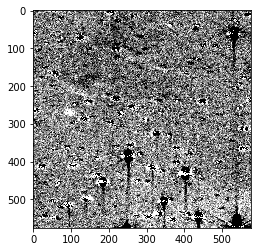

In [34]:
imgtile = np.load("./dataset/LE_cand1/tiles_all/001_2.fits.npz")['fitsarr']
imgtile = fits_to_uint8(imgtile)
plt.imshow(imgtile, cmap='gray')


In [6]:
imgtiles = glob.glob("./dataset/LE_cand1/tiles_all/*.fits.npz")

In [7]:
imgtiles.sort()

In [8]:
imgtiles

['./dataset/LE_cand1/tiles_all/001_0.fits.npz',
 './dataset/LE_cand1/tiles_all/001_1.fits.npz',
 './dataset/LE_cand1/tiles_all/001_2.fits.npz',
 './dataset/LE_cand1/tiles_all/001_3.fits.npz',
 './dataset/LE_cand1/tiles_all/001_4.fits.npz',
 './dataset/LE_cand1/tiles_all/001_5.fits.npz',
 './dataset/LE_cand1/tiles_all/001_6.fits.npz',
 './dataset/LE_cand1/tiles_all/001_7.fits.npz',
 './dataset/LE_cand1/tiles_all/001_8.fits.npz',
 './dataset/LE_cand1/tiles_all/002_0.fits.npz',
 './dataset/LE_cand1/tiles_all/002_1.fits.npz',
 './dataset/LE_cand1/tiles_all/002_2.fits.npz',
 './dataset/LE_cand1/tiles_all/002_3.fits.npz',
 './dataset/LE_cand1/tiles_all/002_4.fits.npz',
 './dataset/LE_cand1/tiles_all/002_5.fits.npz',
 './dataset/LE_cand1/tiles_all/002_6.fits.npz',
 './dataset/LE_cand1/tiles_all/002_7.fits.npz',
 './dataset/LE_cand1/tiles_all/002_8.fits.npz',
 './dataset/LE_cand1/tiles_all/003_0.fits.npz',
 './dataset/LE_cand1/tiles_all/003_1.fits.npz',
 './dataset/LE_cand1/tiles_all/003_2.fit

In [11]:
imgtiles[9*14:9*15]

['./dataset/LE_cand1/tiles_all/015_0.fits.npz',
 './dataset/LE_cand1/tiles_all/015_1.fits.npz',
 './dataset/LE_cand1/tiles_all/015_2.fits.npz',
 './dataset/LE_cand1/tiles_all/015_3.fits.npz',
 './dataset/LE_cand1/tiles_all/015_4.fits.npz',
 './dataset/LE_cand1/tiles_all/015_5.fits.npz',
 './dataset/LE_cand1/tiles_all/015_6.fits.npz',
 './dataset/LE_cand1/tiles_all/015_7.fits.npz',
 './dataset/LE_cand1/tiles_all/015_8.fits.npz']

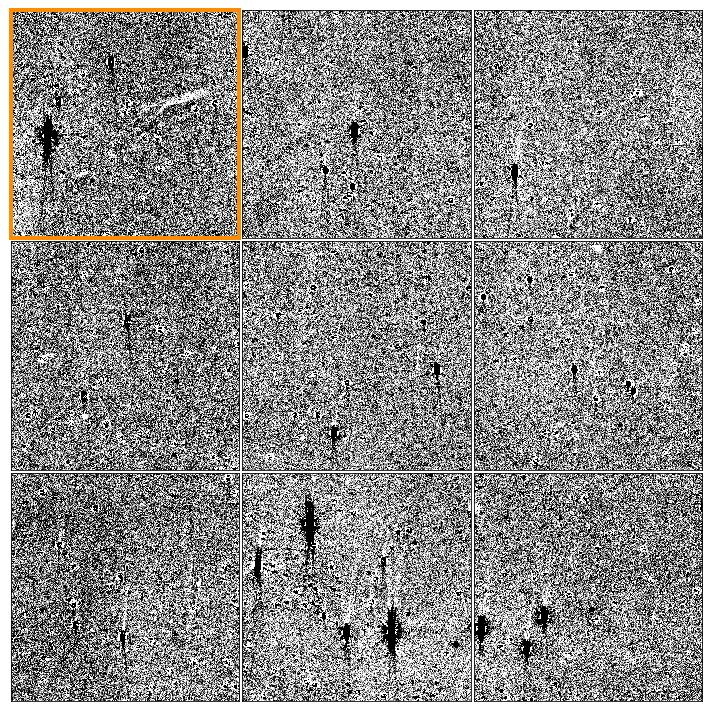

In [17]:
N = 3
M = 3

fig, axs = plt.subplots(N, M, figsize=(10, 10), 
                       )#gridspec_kw={'wspace':0.1, 'hspace':0.1}, )
axs = axs.flatten()
for i, imgtile in enumerate(imgtiles[9*14:9*15]):
    ax = axs[i]
    imgtile = np.load(imgtile)['fitsarr']
    imgtile = fits_to_uint8(imgtile)
    ax.imshow(imgtile, cmap='gray')
    #ax.set_axis_off()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])

    #ax.set_title(f'001_{i}')
    #plot_bboxes(imgtile.astype(np.uint8), bboxes=box_tiles[i], ax=ax)
    # hightlight image with LE
    if i in [ 0,]:
        [sp.set_color('DarkOrange') for sp in ax.spines.values()]
        [sp.set_linewidth(4) for sp in ax.spines.values()]


fig.tight_layout(h_pad=-0.4, w_pad=-.4)
